<a href="https://colab.research.google.com/github/YuriiSulima/ML-models-for-CO2-Reduction/blob/main/ML_Models_(Version_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import tensorflow as tf
import xgboost as xgb
import shap

In [ ]:
data = pd.read_csv("YS01 - Test Data.csv")
print(data.shape)

(103, 13)


In [ ]:
data.describe()

,Index,Hole Scavenger (mM),Catalyst amount (umol),QD amount (umol),H2 Area,CH4 Area,CO Area,pH before,pH after,Time
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,24.000000,30.000000,103.000000
mean,52.000000,135.378641,0.189267,0.000863,234.602445,61.885107,12156.875203,6.090833,5.979667,22.533728
std,29.877528,133.968691,0.510282,0.000391,224.914241,83.247479,16441.798879,0.491227,0.404675,7.077719
min,1.000000,0.000000,0.000000,0.000000,0.246000,0.000000,0.762800,4.670000,4.670000,4.000000
25%,26.500000,100.000000,0.000400,0.000800,64.093100,18.740100,2411.734300,6.012500,5.927500,23.000000
50%,52.000000,100.000000,0.002000,0.000800,185.733600,36.828500,6873.664600,6.275000,6.120000,24.000000
75%,77.500000,100.000000,0.010000,0.000800,288.234500,63.701800,12489.721250,6.370000,6.222500,27.000000
max,103.000000,900.000000,2.000000,0.002000,1000.759800,550.416800,72757.168000,6.540000,6.350000,29.000000


In [ ]:
data.head()

,Index,QDs,Hole Scavengar,Catalyst,Hole Scavenger (mM),Catalyst amount (umol),QD amount (umol),H2 Area,CH4 Area,CO Area,pH before,pH after,Time
0,1,ZnSe,NaAsc,FeCl3,100,0.0002,0.0008,44.6310,21.4564,1814.1244,NaN,5.95,24.0
1,2,ZnSe,NaAsc,FeCl3,100,0.0020,0.0008,109.6600,23.6980,5444.0798,NaN,6.03,24.0
2,3,ZnSe,NaAsc,FeCl3,100,0.0100,0.0008,124.1470,27.3552,11515.6370,NaN,6.08,24.0
3,4,ZnSe,NaAsc,FeCl3,100,0.2000,0.0008,232.4260,73.7740,72757.1680,NaN,5.75,24.0
4,5,ZnSe,NaAsc,FeCl3,100,1.0000,0.0008,493.4962,190.1524,39207.7339,NaN,4.75,24.0


In [ ]:
data.dtypes

Index                       int64
QDs                        object
Hole Scavengar             object
Catalyst                   object
Hole Scavenger (mM)         int64
Catalyst amount (umol)    float64
QD amount (umol)          float64
H2 Area                   float64
CH4 Area                  float64
CO Area                   float64
pH before                 float64
pH after                  float64
Time                      float64
dtype: object

# Preprocessing the data

In [ ]:
catalyst_encoder = LabelEncoder()
scavenger_encoder = LabelEncoder()

data.drop(['Index'],axis=1,inplace=True)
data.drop(['QDs'],axis=1,inplace=True)
data.drop(['Hole Scavengar'],axis=1,inplace=True)

data['Catalyst'] = catalyst_encoder.fit_transform(data['Catalyst'])
label_mapping = dict(zip(catalyst_encoder.classes_, catalyst_encoder.transform(catalyst_encoder.classes_)))
print(label_mapping)

data.drop(['H2 Area'],axis=1,inplace=True)
data.drop(['CH4 Area'],axis=1,inplace=True)
data.drop(['pH after'],axis=1,inplace=True)

# data['CO Area'] = data['CO Area'] / data['Time ']
# data.drop(['Time '],axis=1,inplace=True)

data = data.fillna(0)

features_scaler = StandardScaler()
target_scaler = StandardScaler()

data_pipeline = Pipeline([
        ('std_scaler', features_scaler),
    ])

target_pipeline = Pipeline([
        ('std_scaler', target_scaler),
    ])

target = data['CO Area']
features = data.drop('CO Area', axis=1)

columns_f = features.columns

features = data_pipeline.fit_transform(features)
features = pd.DataFrame(features,columns=columns_f)

target = target_pipeline.fit_transform(target.to_numpy().reshape(-1,1))
target = pd.DataFrame(target,columns=['CO Area'])


{'Co-TPP-COOH4': 0, 'CoCl2': 1, 'FeCl2': 2, 'FeCl3': 3, 'MnCl2': 4, 'ZnAc2': 5, 'ZnCl2': 6, nan: 7}


# Splitting the dataset

In [ ]:
#split
x_train, X_test, y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=6) #Best-performing states: 6, 21
index_before = Y_test.index
Y_test = Y_test.sort_values(by='CO Area')
sorted_indices = Y_test.index

In [ ]:
data.corr()['CO Area'].sort_values(ascending=False)

CO Area                   1.000000
Catalyst amount (umol)    0.574936
pH before                 0.204087
Time                      0.147696
Catalyst                  0.030353
QD amount (umol)         -0.064496
Hole Scavenger (mM)      -0.093661
Name: CO Area, dtype: float64

# Defining functions

In [ ]:
def rmse(y_actual, y_predicted):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return sqrt(mean_squared_error(y_actual, y_predicted))
def plotShap(shap_values):
    # Calculate the mean absolute SHAP values
    mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

    # Sort feature names and SHAP values together
    sorted_indices = np.argsort(mean_abs_shap_values)
    sorted_feature_names = columns_f[sorted_indices]
    sorted_mean_abs_shap_values = mean_abs_shap_values[sorted_indices]

    mse = mean_squared_error(Y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, pred)
    # Plot a vertical bar chart of feature importances with values
    plt.figure(figsize=(10, 6))
    plt.figtext(0.87, 0.12, f"MSE: {mse:.5f}, RMSE: {rmse:.5f}, R2: {r2:.5f}", horizontalalignment='right')
    plt.barh(range(len(sorted_feature_names)), sorted_mean_abs_shap_values, color='blue')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Mean Absolute SHAP Value')
    plt.title('Feature Importances with SHAP Values')
    # Add values next to the bars
    for index, value in enumerate(sorted_mean_abs_shap_values):
        plt.text(value, index, f'{value:.2f}', va='center')
    plt.show()
    return
def display_results():
    # Create a dataframe with X_test, y_test, and predictions
    results_df = pd.DataFrame(X_test)
    results_df['True Values'] = Y_test
    results_df['Predicted Values'] = pred

    # Display the dataframe
    print(results_df)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
def best_hiper_search(features_train, target_train):
    parametrs_DTR = {'max_depth': range (1,13, 1)}
    parametrs_RFR = {'n_estimators': range (1, 10, 2),'max_depth': range (1,10, 1)}
    parametrs_LR = {'fit_intercept':[True,False]}

    rmse_scorer = make_scorer(rmse, greater_is_better=True)


    grid_DTR = GridSearchCV(DecisionTreeRegressor(), parametrs_DTR, cv=5, scoring=rmse_scorer)
    grid_RFR = GridSearchCV(RandomForestRegressor(), parametrs_RFR, cv=10, scoring=rmse_scorer)
    grid_LR = GridSearchCV(LinearRegression(), parametrs_LR, cv=5, scoring=rmse_scorer)


    grid_DTR.fit(features_train, target_train)
    grid_RFR.fit(features_train, target_train)
    grid_LR.fit(features_train, target_train)


    print("DecisionTreeRegressor", grid_DTR.scorer_, grid_DTR.best_score_, grid_DTR.best_params_)
    print("RandomForestRegressor", grid_RFR.scorer_, grid_RFR.best_score_, grid_RFR.best_params_)
    print("LinearRegression", grid_LR.scorer_, grid_LR.best_score_, grid_LR.best_params_)
    return

# Function to split, train, and evaluate the model
def evaluate_random_state_xgb(random_state):
    # Split the dataset using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=random_state)

    # Train an XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, r2
# Function to split, train, and evaluate the model
def evaluate_random_state_dtr(random_state):
    # Split the dataset using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=random_state)

    # Train an DTR model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, r2
def evaluate_random_state_rfr(random_state):
    # Split the dataset using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=random_state)

    # Train an RFR model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, r2

print("Selection of hyperparameters:")
best_hiper_search(x_train, y_train)
print('')

Selection of hyperparameters:


/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

DecisionTreeRegressor make_scorer(rmse) 0.8035777045287273 {'max_depth': 5}
RandomForestRegressor make_scorer(rmse) 1.0262572156670893 {'max_depth': 7, 'n_estimators': 1}
LinearRegression make_scorer(rmse) 0.9319253442694156 {'fit_intercept': True}



/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

# Linear Regression

Scores: [0.79869712 0.53586494 0.83535077 1.470277   0.76553411 0.94418572
 0.88338641 1.32417412 0.9231984  0.92922841]
Mean: 0.9409897003350872
Standard deviation: 0.25633494822939257
RMSE:  0.49174376007967174
Mean Absolute Error of the model is:  0.34538785095572705
Аccuracy : 0.350869164381687
R2:  -0.42177221040482515


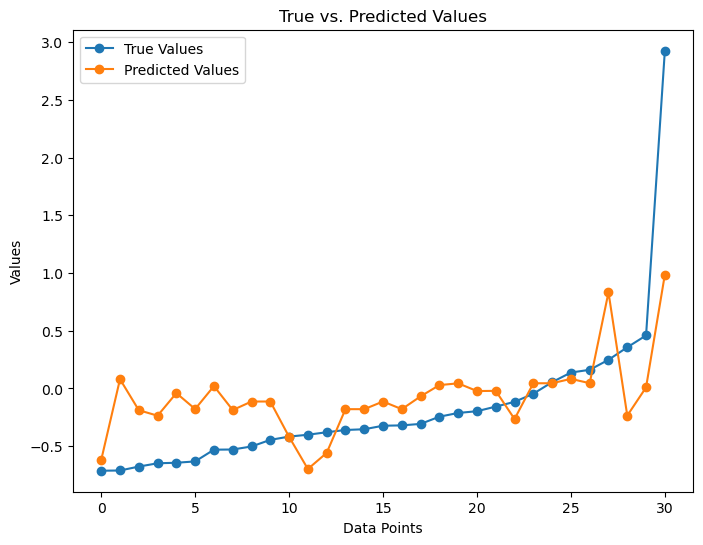

In [ ]:
model = LinearRegression(fit_intercept = True)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

model.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)

accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", -accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", -r2)

# Plotting
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

# Decision Tree Regressor

RMSE:  0.2536447551141633
Mean Absolute Error of the model is:  0.16419152400453754
Scores: [0.46032323 0.43577796 0.53942614 0.90857228 0.76482029 0.76627792
 0.88628878 0.35493136 0.62369863 1.33008664]
Mean: 0.7070203232758762
Standard deviation: 0.27590815941798097
Аccuracy : -1.3974898722383715
R2:  0.8461586730093382


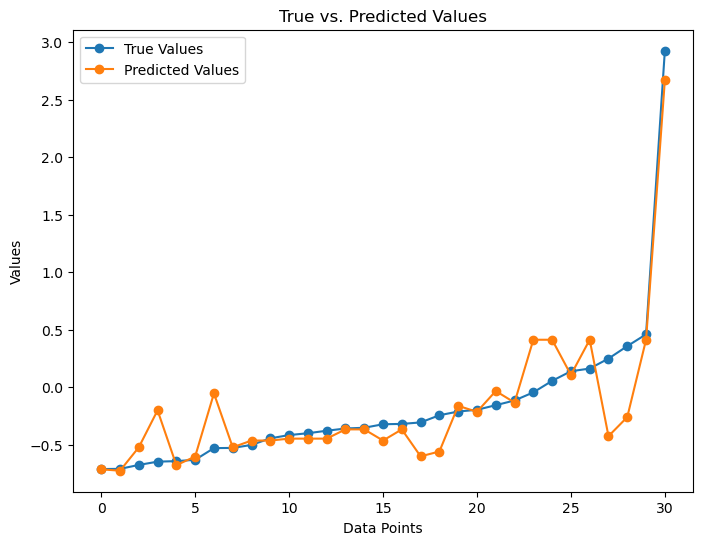

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)

scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

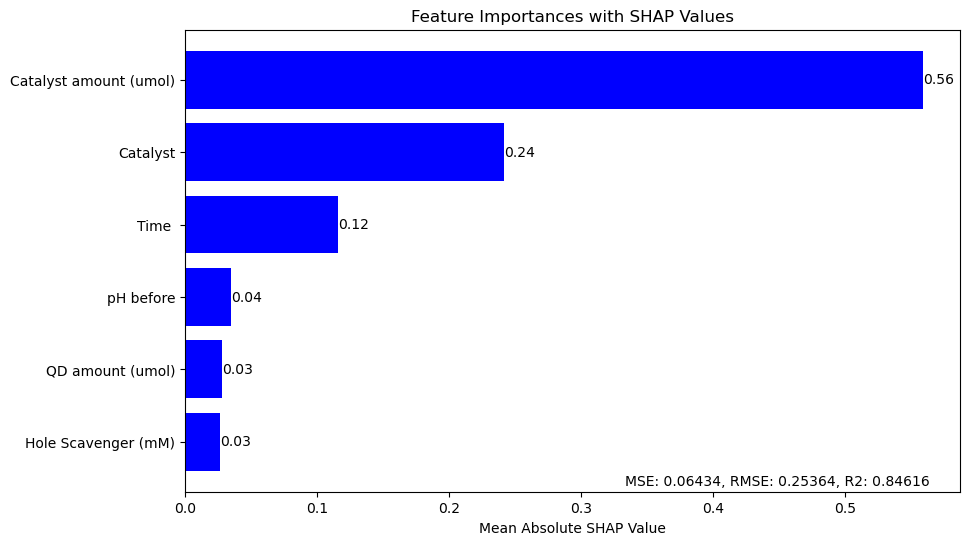

In [ ]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Compute the base value (expected value of the model output)
base_value = explainer.expected_value
#shap.summary_plot(shap_values, X_test, feature_names=columns_f)
plotShap(shap_values)

Best Random State:
Random State    6.000000
MSE             0.063861
RMSE            0.252708
R²              0.847293
Name: 6, dtype: float64


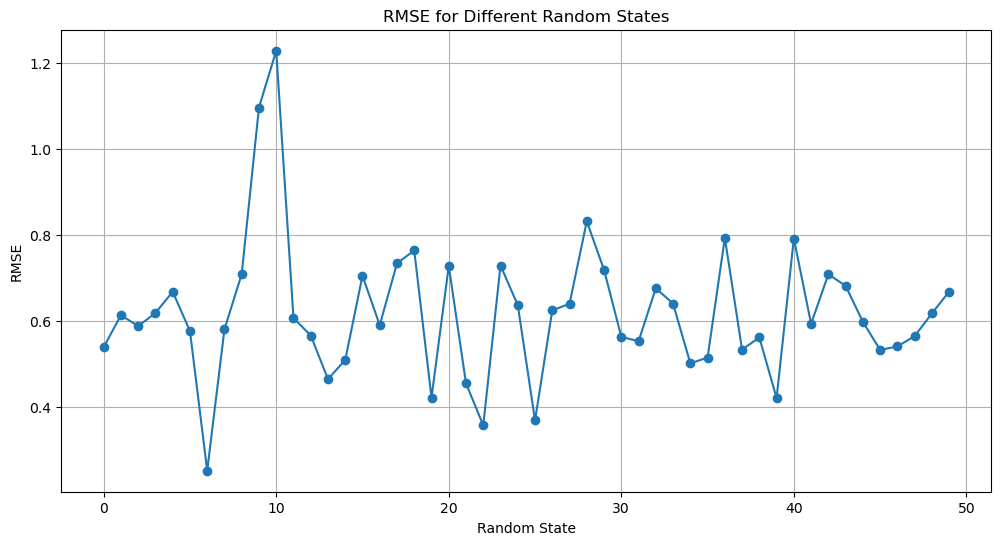

In [ ]:
# Try different random states and record performance
results = []
for random_state in range(50):  # Try 50 different random states
    mse, rmse, r2 = evaluate_random_state_dtr(random_state)
    results.append((random_state, mse, rmse, r2))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'MSE', 'RMSE', 'R²'])

# Find the best random state based on RMSE
best_random_state = results_df.loc[results_df['RMSE'].idxmin()]

print("Best Random State:")
print(best_random_state)

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['RMSE'], marker='o')
plt.title('RMSE for Different Random States')
plt.xlabel('Random State')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


# Random Forest Regressor

RMSE:  0.2584815585754293
Mean Absolute Error of the model is:  0.17786905416758447
Аccuracy : -0.9688354671796846
R2:  0.8402354678382453


/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

Scores: [0.63882433 0.41003587 0.42141833 0.63928516 0.70652769 0.90237859
 0.63650304 0.50048408 0.39066003 0.70013689]
Mean: 0.5946254006543381
Standard deviation: 0.15446910694730775


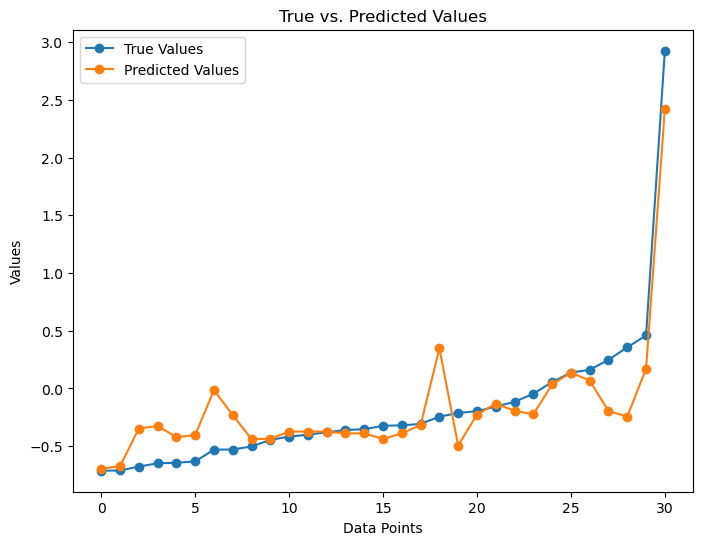

In [ ]:
model = RandomForestRegressor(max_depth = 6)
model.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

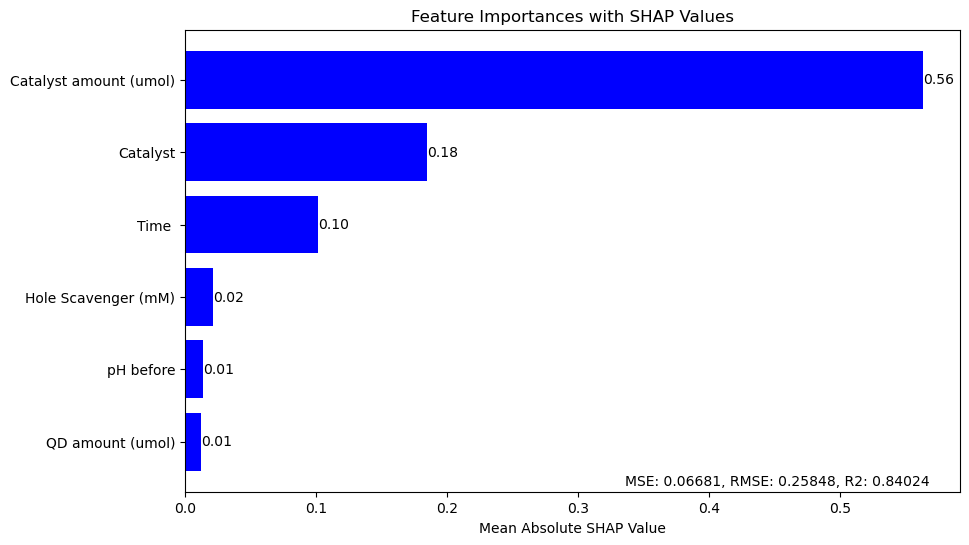

In [ ]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Compute the base value (expected value of the model output)
base_value = explainer.expected_value
#shap.summary_plot(shap_values, X_test, feature_names=columns_f)
plotShap(shap_values)

/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was

Best Random State:
Random State    6.000000
MSE             0.060206
RMSE            0.245369
R²              0.856034
Name: 6, dtype: float64


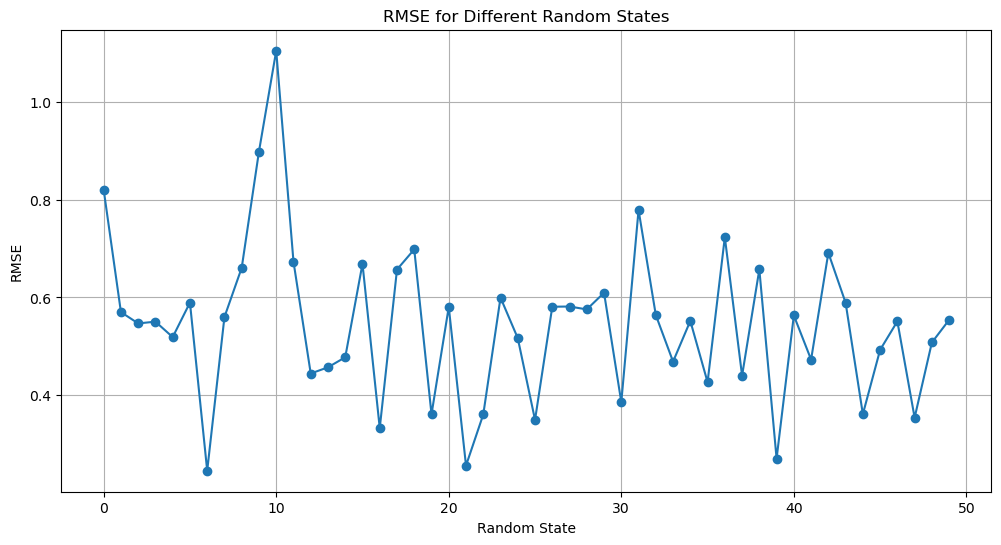

In [ ]:
# Try different random states and record performance
results = []
for random_state in range(50):  # Try 50 different random states
    mse, rmse, r2 = evaluate_random_state_rfr(random_state)
    results.append((random_state, mse, rmse, r2))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'MSE', 'RMSE', 'R²'])

# Find the best random state based on RMSE
best_random_state = results_df.loc[results_df['RMSE'].idxmin()]

print("Best Random State:")
print(best_random_state)

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['RMSE'], marker='o')
plt.title('RMSE for Different Random States')
plt.xlabel('Random State')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


# SVR

RMSE:  0.5686903641768575
Mean Absolute Error of the model is:  0.36857417664635034
Аccuracy : -2.734590926566107
R2:  0.2266555306769813
Scores: [0.87359205 0.73829052 1.10229197 1.29423857 0.7253341  0.55690359
 0.69222788 1.31398112 0.61477117 0.59382126]
Mean: 0.8505452223167467
Standard deviation: 0.27140551299620064


/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

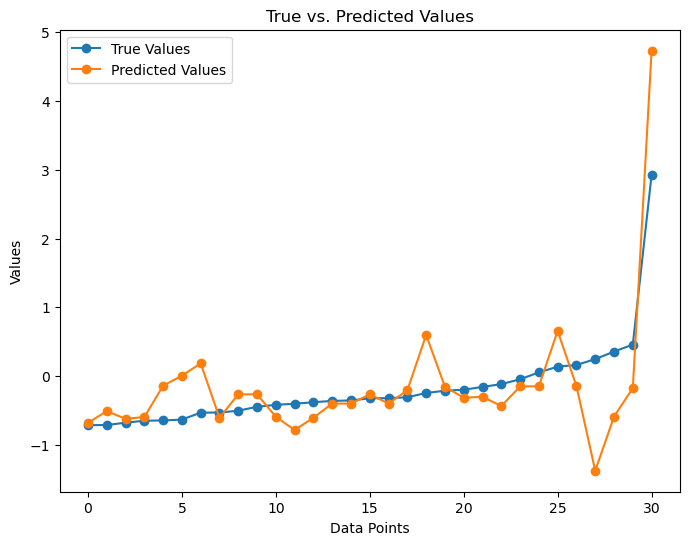

In [ ]:
model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

# Lasso Model

In [ ]:
# lasso_reg = Lasso(alpha=0.1)
# lasso_reg.fit(x_train, y_train)
# pred = model.predict(X_test)
# print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
# #Calculation of Mean Absolute Error
# mae = mean_absolute_error(Y_test, pred)
# print('Mean Absolute Error of the model is: ', mae)
# accuracy = model.score(X_test, Y_test)
# print("Аccuracy", ":", accuracy)

# scores = cross_val_score(model, x_train, y_train,
#                                 scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
# display_scores(rmse_scores)
# plt.figure(figsize=(8, 6))

# # Plot true values
# plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# # Plot predicted values
# plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# # Add labels and legend
# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.title('True vs. Predicted Values')
# plt.legend()

# plt.show()

# Elastic Net

/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

RMSE:  0.5686903641768575
Mean Absolute Error of the model is:  0.36857417664635034
Аccuracy : -2.734590926566107
R2:  0.2266555306769813
Scores: [0.87359205 0.73829052 1.10229197 1.29423857 0.7253341  0.55690359
 0.69222788 1.31398112 0.61477117 0.59382126]
Mean: 0.8505452223167467
Standard deviation: 0.27140551299620064


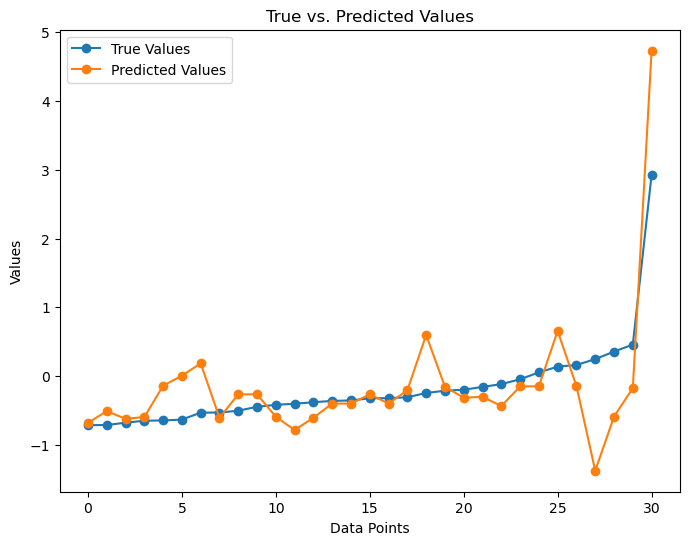

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

# XGB Regressor

RMSE:  0.26597516977247915
Mean Absolute Error of the model is:  0.17557673363072163
Аccuracy : -1.1290494219529275
R2:  0.830837757340665
Scores: [0.73235471 0.32673733 0.64537732 0.81948605 0.49701109 0.52061183
 0.78164818 0.30246494 0.61824851 0.76646006]
Mean: 0.6010400024375198
Standard deviation: 0.17575181384568137


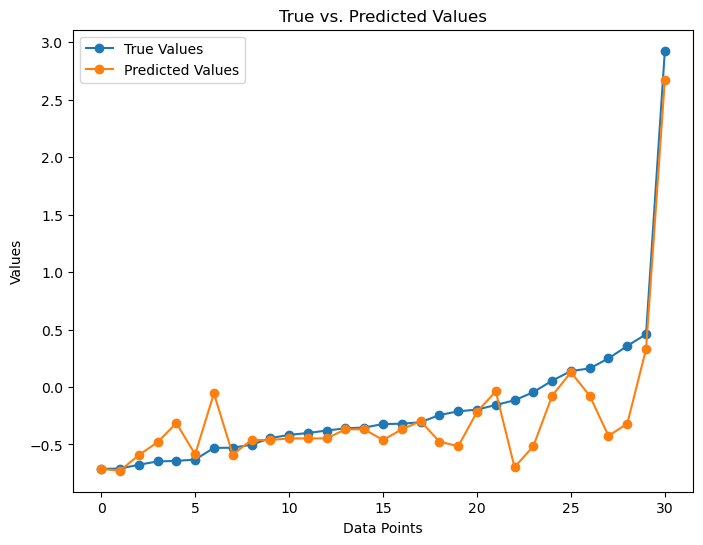

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(x_train, y_train)
pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

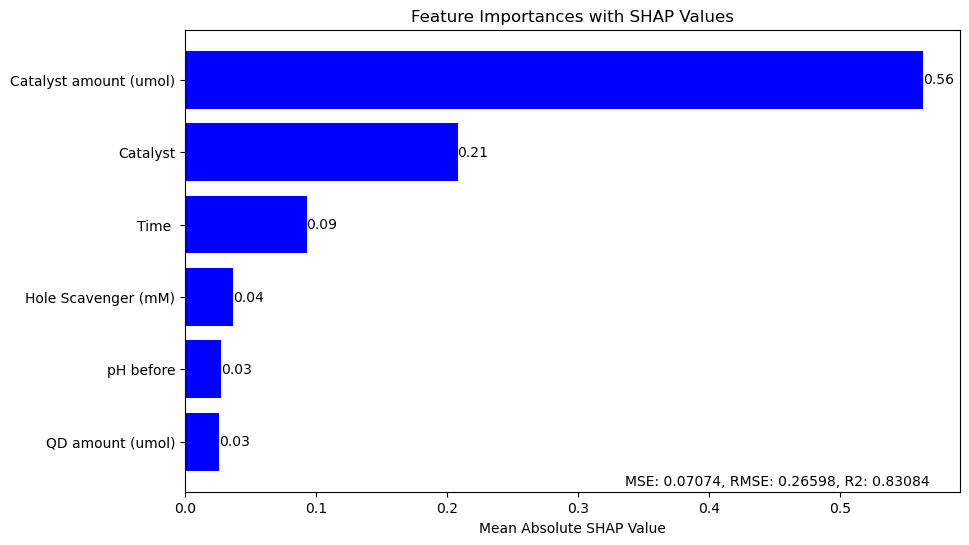

In [ ]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Compute the base value (expected value of the model output)
base_value = explainer.expected_value
plotShap(shap_values)

Best Random State:
Random State    6.000000
MSE             0.070743
RMSE            0.265975
R²              0.830838
Name: 6, dtype: float64


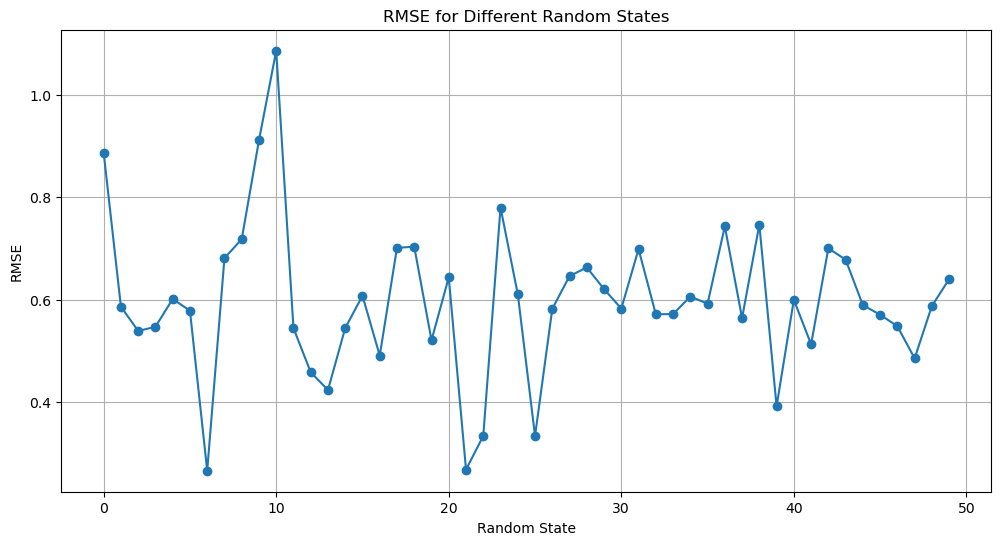

In [ ]:
# Try different random states and record performance
results = []
for random_state in range(50):  # Try 50 different random states
    mse, rmse, r2 = evaluate_random_state_xgb(random_state)
    results.append((random_state, mse, rmse, r2))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'MSE', 'RMSE', 'R²'])

# Find the best random state based on RMSE
best_random_state = results_df.loc[results_df['RMSE'].idxmin()]

print("Best Random State:")
print(best_random_state)

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['RMSE'], marker='o')
plt.title('RMSE for Different Random States')
plt.xlabel('Random State')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


# Ensemble

RMSE:  0.22238217544281236
Mean Absolute Error of the model is:  0.14986613610105579
Аccuracy : -1.1290494219529275
R2:  0.8817445422929558


/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scores: [0.73235471 0.32673733 0.64537732 0.81948605 0.49701109 0.52061183
 0.78164818 0.30246494 0.61824851 0.76646006]
Mean: 0.6010400024375198
Standard deviation: 0.17575181384568137


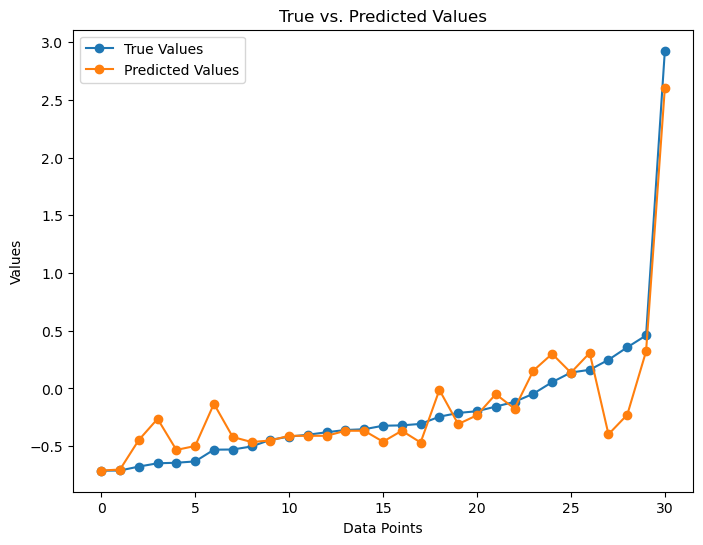

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
voter = VotingRegressor(
    estimators=[('dtr', dtr), ('rfr', rfr)])
voter.fit(x_train, y_train)
pred = voter.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

# Bagging Regressor

/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


RMSE:  0.30505514211693674
Mean Absolute Error of the model is:  0.19037584225956805
Аccuracy : -1.1290494219529275
R2:  0.7774754432541031
Scores: [0.73235471 0.32673733 0.64537732 0.81948605 0.49701109 0.52061183
 0.78164818 0.30246494 0.61824851 0.76646006]
Mean: 0.6010400024375198
Standard deviation: 0.17575181384568137


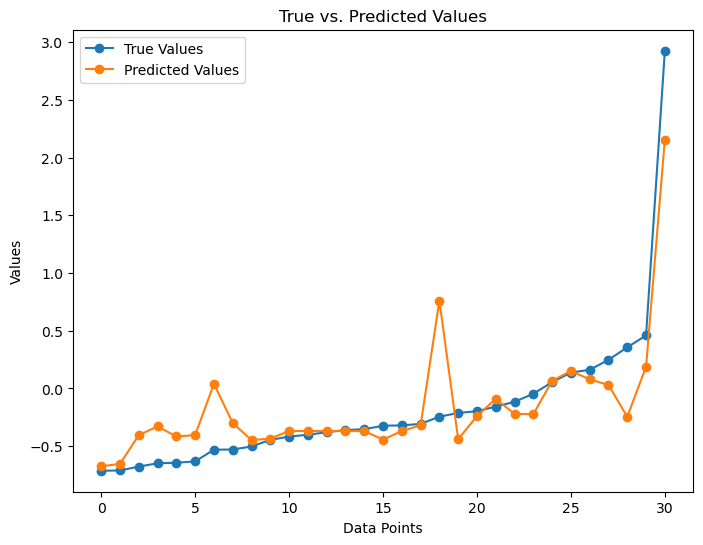

In [ ]:
bag = BaggingRegressor(
    VotingRegressor(estimators=[('dtr', dtr), ('rfr', rfr)]), n_estimators=500,
    max_samples=70, bootstrap=True, n_jobs=-1, random_state=42)
bag.fit(x_train, y_train)
pred = bag.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

print('RMSE: ', mean_squared_error(Y_test, pred)**0.5)
#Calculation of Mean Absolute Error
mae = mean_absolute_error(Y_test, pred)
print('Mean Absolute Error of the model is: ', mae)
accuracy = model.score(X_test, Y_test)
print("Аccuracy", ":", accuracy)
r2 = r2_score(Y_test, pred)
print("R2: ", r2)
scores = cross_val_score(model, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()

# # Calculate differences
# difference = [p - t for p, t in zip(pred, Y_test)]

# # Create DataFrame
# dt = {'True Values': Y_test,
#         'Predicted Values': pred,
#         'Difference': difference}

# df = pd.DataFrame(dt)
# df

# Perceptron (ANN)

In [ ]:
#per = Perceptron(max_iter=100, random_state=42)
#per.fit(x_train, y_train)

# DNN

Epoch 1/500


/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/yuriisulima/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.3532 - val_loss: 0.8034
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2967 - val_loss: 0.7655
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1520 - val_loss: 0.7410
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0714 - val_loss: 0.7303
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9592 - val_loss: 0.7284
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0499 - val_loss: 0.7347
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9481 - val_loss: 0.7357
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8108 - val_loss: 0.7419
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8914 - val_loss: 0.7525
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8455 - val_loss: 0.7511
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7859 - val_loss: 0.7434
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8671 - val_loss: 0.7205
Epo

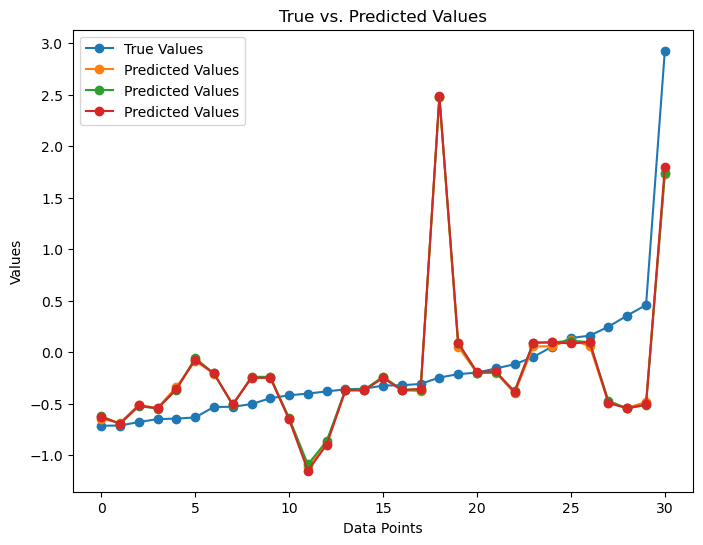

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout

model = Sequential([
    Dense(100,input_shape=(6,)),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),
    Dense(100),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),
    Dense(100),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),
    Dense(3)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)

pred = model.predict(X_test)

#Sorting
dictionary = {index: prediction for index, prediction in zip(index_before, pred)}
pred = np.array([dictionary[idx] for idx in sorted_indices])

rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)
plt.figure(figsize=(8, 6))

# Plot true values
plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# Plot predicted values
plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs. Predicted Values')
plt.legend()

plt.show()



# RNN (Recurrent Neural Network)

In [ ]:
# from tensorflow.keras.layers import SimpleRNN
# model = Sequential([
#     SimpleRNN(64, input_shape=(10,1)),  # RNN layer with 64 neurons
#     Dropout(0.2),  # Dropout layer to prevent overfitting
#     SimpleRNN(64),  # RNN layer with 64 neurons
#     Dropout(0.2),  # Dropout layer to prevent overfitting
#     SimpleRNN(32),  # RNN layer with 32 neurons
#     Dropout(0.2),  # Dropout layer to prevent overfitting
#     Dense(3)  # Output layer with no activation function for regression
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

# X_train_RNN = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# X_test_RNN = x_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# Y_train_RNN = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
# Y_test_RNN = y_test.reshape((Y_test.shape[0], Y_test.shape[1], 1))

# model.fit(X_train_RNN, Y_train_RNN, epochs=50, batch_size=32, validation_split=0.2)

# loss = model.evaluate(X_test_RNN, Y_test_RNN)
# print("Test Loss:", loss)

# pred = model.predict(X_test_RNN)

# rmse_scores = np.sqrt(-scores)
# display_scores(rmse_scores)
# plt.figure(figsize=(8, 6))

# # Plot true values
# plt.plot(range(len(Y_test)), Y_test, label='True Values', marker='o')

# # Plot predicted values
# plt.plot(range(len(pred)), pred, label='Predicted Values', marker='o')


# # Add labels and legend
# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.title('True vs. Predicted Values')
# plt.legend()

# plt.show()


# Prediction

In [ ]:
print(columns_f)
pred = xgb.predict([[2,873,699,4.57,4.23,24]])
print(pred)
print(label_mapping)


Index(['Catalyst', 'Hole Scavenger (mM)', 'Catalyst amount (umol)',
       'QD amount (umol)', 'pH before', 'Time '],
      dtype='object')


AttributeError: module 'xgboost' has no attribute 'predict'

# RL Model